<a href="https://colab.research.google.com/github/mohamedFayek2005/Ai_platform_/blob/main/Assignment_3_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print("Train:", x_train.shape, "Validation:", x_val.shape, "Test:", x_test.shape)


Train: (48600, 28, 28, 1) Validation: (5400, 28, 28, 1) Test: (10000, 28, 28, 1)


In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.08),
])


In [8]:
def make_model(input_shape=(28,28,1), num_classes=10):
    inp = keras.Input(shape=input_shape)
    x = data_augmentation(inp)
    x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inp, out)
    return model

In [9]:
model_fashion = make_model()
model_fashion.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_fashion.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
es = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
rlrop = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

history_fashion = model_fashion.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[es, rlrop]
)

Epoch 1/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 97s 256ms/step - accuracy: 0.8703 - loss: 0.3517 - val_accuracy: 0.8500 - val_loss: 0.3928 - learning_rate: 0.0010
Epoch 2/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 96s 253ms/step - accuracy: 0.8828 - loss: 0.3267 - val_accuracy: 0.8917 - val_loss: 0.3053 - learning_rate: 0.0010
Epoch 3/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 97s 254ms/step - accuracy: 0.8840 - loss: 0.3107 - val_accuracy: 0.8907 - val_loss: 0.3016 - learning_rate: 0.0010
Epoch 4/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 97s 256ms/step - accuracy: 0.8852 - loss: 0.3152 - val_accuracy: 0.8946 - val_loss: 0.2960 - learning_rate: 0.0010
Epoch 5/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 142s 256ms/step - accuracy: 0.8892 - loss: 0.3093 - val_accuracy: 0.8461 - val_loss: 0.4844 - learning_rate: 0.0010
Epoch 6/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 99s 259ms/step - accuracy: 0.8882 - loss: 0.2956 - val_accuracy: 0.9022 - val_loss: 0.2772 - learning_rate: 0.0010
Epoch 7/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 141s 256ms/step - accuracy: 0

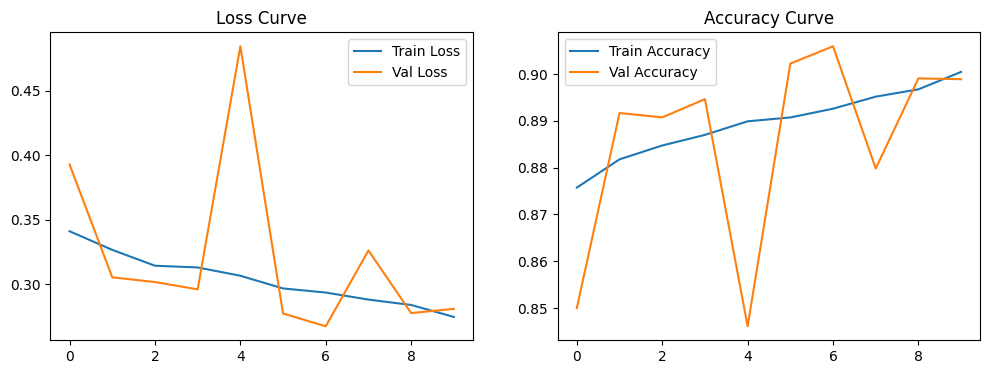

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_fashion.history['loss'], label='Train Loss')
plt.plot(history_fashion.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_fashion.history['accuracy'], label='Train Accuracy')
plt.plot(history_fashion.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


In [14]:
test_loss, test_acc = model_fashion.evaluate(x_test, y_test, verbose=2)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")


313/313 - 5s - 14ms/step - accuracy: 0.9018 - loss: 0.2808

 Test Accuracy: 90.18%


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


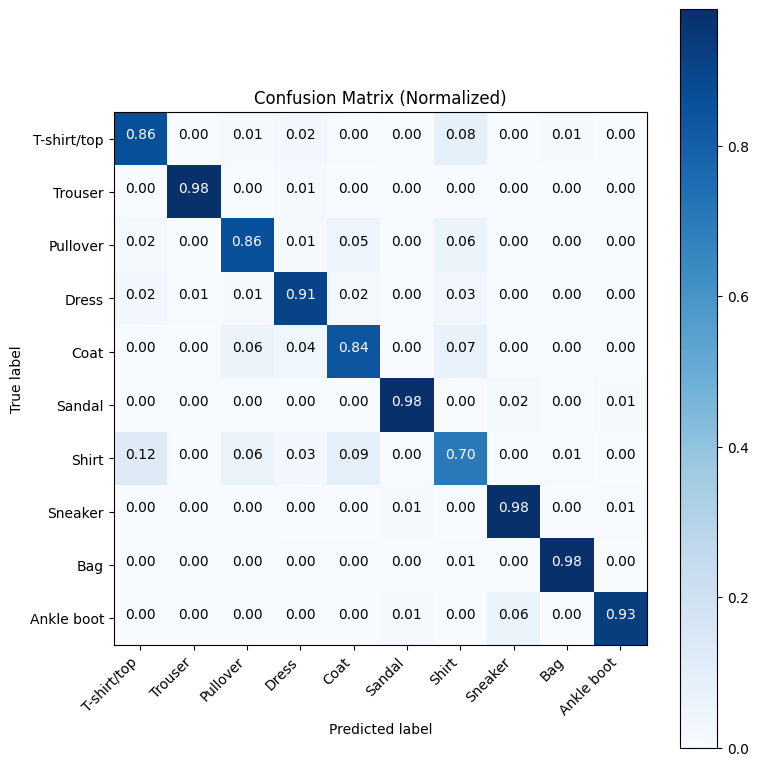


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Model saved as Fashion_MNIST_CNN.h5


In [15]:
y_pred_probs = model_fashion.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
           'Sandal','Shirt','Sneaker','Bag','Ankle boot']

def plot_confusion_matrix(cm, classes, normalize=True):
    if normalize:
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cmn = cm
    plt.figure(figsize=(8,8))
    plt.imshow(cmn, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Normalized)')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cmn.max() / 2.
    for i, j in itertools.product(range(cmn.shape[0]), range(cmn.shape[1])):
        plt.text(j, i, format(cmn[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cmn[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, classes)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=classes))


model_fashion.save("Fashion_MNIST_CNN.h5")
print("Model saved as Fashion_MNIST_CNN.h5")